In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
# con1 = pd.concat([df1,df2],axis=0)
con1 = pd.concat([df1,df2],axis=0, ignore_index=True) # ignore_index = True : 인덱스로 순서 재배열
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
con1 = pd.concat([df1,df2],axis=1)
con2 = pd.concat([df1,df2],axis=1, ignore_index=True)
print(con1,'\n\n',con2)

      a     b     c     d     e   d   e   h   i
0   1.0   2.0   3.0   4.0   5.0  11  12  13  14
1   6.0   7.0   8.0   9.0  10.0  15  16  17  18
2  11.0  12.0  13.0  14.0  15.0  19  20  21  22
3  16.0  17.0  18.0  19.0  20.0  23  24  25  26
4   NaN   NaN   NaN   NaN   NaN  27  28  29  30 

       0     1     2     3     4   5   6   7   8
0   1.0   2.0   3.0   4.0   5.0  11  12  13  14
1   6.0   7.0   8.0   9.0  10.0  15  16  17  18
2  11.0  12.0  13.0  14.0  15.0  19  20  21  22
3  16.0  17.0  18.0  19.0  20.0  23  24  25  26
4   NaN   NaN   NaN   NaN   NaN  27  28  29  30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge() 를 이용한 결합
import pandas as pd
import numpy as np

data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))

# 'ind' 열 추가
df1['ind'] = [1, 2, 3, 4]
df1
# 'ind' 열을 기준으로 두 데이터프레임을 병합
# result = pd.merge(df1, df2, left_on='ind', right_index=True)

print(result)

    a   b   c  d_x  e_x  ind  d_y  e_y   h   i
0   1   2   3    4    5    1   15   16  17  18
1   6   7   8    9   10    2   19   20  21  22
2  11  12  13   14   15    3   23   24  25  26
3  16  17  18   19   20    4   27   28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합(default는 교집합)
df1.join(df2, lsuffix='_1',rsuffix='_2')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2,lsuffix='_1',rsuffix='_2',how='inner') # 교집합값 suffix_1,2로 구분 표시.

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2,lsuffix='_1',rsuffix='_2',how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

filepath1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock valuation.xlsx'
df1 = pd.read_excel(filepath1, engine='openpyxl', index_col = 'id')
df2 = pd.read_excel(filepath2, engine='openpyxl', index_col = 'id')

print(df1,'\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how = 'left'옵션이 기본 적용
df3 = df1.join(df2) # 기준 설정 안했으므로 디폴트 옵션 (left : df1)적용. df1에 없는건 제외, df2에 교집합 없는건 NaN 출력
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3 = df1.join(df2, how = 'right') # 결합기준 오른쪽 적용
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
df4 = df1.join(df2, how='inner')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# Q. df4에서 중복된 컬럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터 프레임을 생성하고
# df5 이름으로 저장 및 출력하세요. (단, '<'와 '=='를 반드시 사용해야 함)

df4.drop('name',axis =1, inplace = True) # stock_name = name 중복으로 삭제
df5 = df4[(df4['eps'] < 3000) | (df4['stock_name'] == '이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
data = np.arange(20).reshape(4,5)

df = pd.DataFrame(data, columns = ['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1)
df1.drop(df1.index[0]) # 인덱스 지정해서 행 지우기

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
idx = df1[df1.a > 10].index # 조건 설정하여 index[3] 삭제, 값 하나라도 포함되있으면 행 전체삭제됨.
print(idx, '\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
cond1 = df.a > 10
cond2 = df.b == 16
cond3 = df.e > 15

print(df[cond1 & cond2 & cond3])
print()
print(df[cond1 | cond2 | cond3])

    a   b   c   d   e
3  15  16  17  18  19

    a   b   c   d   e
3  15  16  17  18  19


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf =df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf.rename(columns = {'sex':'gender','fare':'ticket'}, inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 컬럼 값 변경
df1 = tdf[['gender']].replace(['female','male'], [1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
tdf1 = tdf.copy()
tdf1.gender.replace({'female':1, 'male':0}, inplace = True)
tdf1.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis = 'columns', inplace = True) # lower 소문자 변경
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2 = df.copy()

In [ ]:
df2.columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 컬럼 순서 변경
columns_customed = ['pclass','sex','age','survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1 = tdf[['age','ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   ticket  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [ ]:
# Data type 바꾸기 float -> int
tdf1 = tdf1.astype({'age':'int', 'ticket':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   ticket  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# age 컬럼의 값 구성 체크
print(tdf.age.value_counts())
print()
age_counts_sorted = tdf.age.value_counts()
print()
age_counts_sorted.sort_index()


age
88    177
31     30
28     27
23     26
36     25
     ... 
49      1
71      1
4       1
30      1
86      1
Name: count, Length: 89, dtype: int64




age
0       1
1       1
2       2
3       2
4       1
     ... 
84      1
85      2
86      1
87      1
88    177
Name: count, Length: 89, dtype: int64

In [ ]:
# age 칼럼의 고유 구성 요소
len(tdf.age.unique())
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
# 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly'

def get_category(age):
    if 0 < age < 5:
        return 'Baby'
    elif 5 < age < 12:
        return 'Child'
    elif 12 < age < 19:
        return 'Teenager'
    elif 19 < age < 30:
        return 'Young Adult'
    elif 30 < age < 60 :
        return 'Adult'
    else:
        return 'Elderly'

tdf['age_cat'] = tdf.age.apply(lambda x: get_category(x))
tdf.head()

category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


from matplotlib import pyplot as plt
_df_0['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sibsp'].plot(kind='hist', bins=20, title='sibsp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('who').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('adult_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='survived', y='pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='pclass', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='age', y='sibsp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='sibsp', y='ticket', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('who')):
  _plot_series(series, series_name, i)
  fig.legend(title='who', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('adult_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='adult_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
_df_16['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['sibsp'].plot(kind='line', figsize=(8, 4), title='sibsp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['embarked'].value_counts()
    for x_label, grp in _df_20.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('embarked')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['who'].value_counts()
    for x_label, grp in _df_21.groupby('embarked')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('embarked')
_ = plt.ylabel('who')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['adult_male'].value_counts()
    for x_label, grp in _df_22.groupby('who')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('who')
_ = plt.ylabel('adult_male')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['embark_town'].value_counts()
    for x_label, grp in _df_23.groupby('adult_male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('adult_male')
_ = plt.ylabel('embark_town')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='survived', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='survived', y='embarked', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['who'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='survived', y='who', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['adult_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='survived', y='adult_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from google.colab import files
# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
from sklearn.preprocessing import LabelEncoder # 값 결과를 숫자로 바꿔주는거

# 예제 데이터
data = {'color' : ['red','blue','green','blue','red']}
df = pd.DataFrame(data)
print(df, '\n')
#Label Encoding 적용
label_encoder = LabelEncoder()

   color
0    red
1   blue
2  green
3   blue
4    red 



In [ ]:
tdf.gender.value_counts()

gender
male      577
female    314
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['gender','age']
for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


In [ ]:
tdf2 = tdf[['gender','class']]
tdf2.head()

,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [ ]:
pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

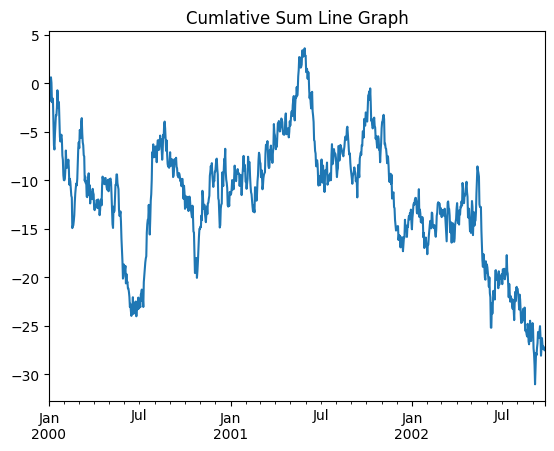

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts = pd.Series(np.random.randn(1000), index =pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

# 라인 그래프
ts.plot()
plt.title('Cumlative Sum Line Graph')
plt.show()

              a         b
one    0.596904  0.194206
two    0.975248  0.020348
three  0.328055  0.916929
four   0.816927  0.432176
five   0.505417  0.969751 



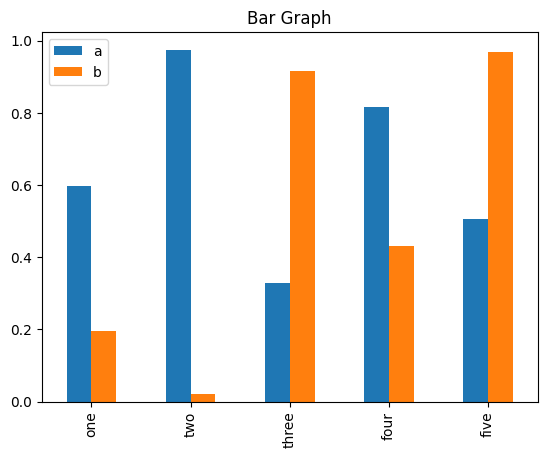

In [ ]:
df = pd.DataFrame({
    'a':np.random.rand(5),
    'b':np.random.rand(5)
}, index = ['one', 'two','three','four','five'])
print(df,'\n')
#막대그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show()

            A         B
0   -1.363987  1.040937
1    0.764739  1.239097
2   -1.620191  1.683158
3    0.611755  0.068577
4   -0.634328  2.037778
..        ...       ...
995 -0.539933  0.102650
996  0.216711 -0.477644
997  0.126711  0.202855
998  0.380738 -0.199093
999  0.431843 -0.690539

[1000 rows x 2 columns] 



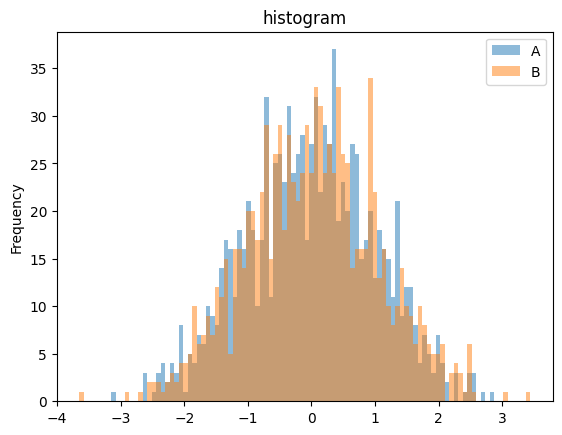

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)
})
print(df,'\n')
#히스토그램
df.plot.hist(alpha=0.5, bins = 100)
plt.title("histogram")
plt.show()

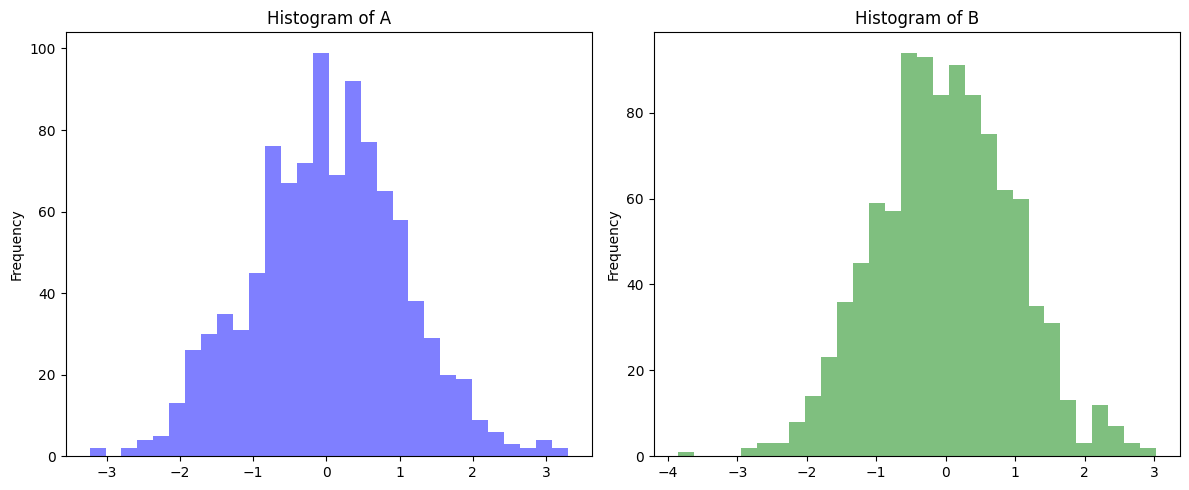

In [ ]:
# 예제 데이터프레임 생성
df = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)
})

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()